In [ ]:
df_listings.hist()
sns.heatmap(df_listings.corr(), annot=True, fmt=".2f");

In [55]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
# let's take a look of Airbnb boston dataset (reviews)
df_calendar = pd.read_csv('calendar.csv')
df_listings = pd.read_csv('listings.csv')
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,9569407,2022-06-13,f,$60.00,$60.00,91,1125
1,9569407,2022-06-14,f,$60.00,$60.00,91,1125
2,9569407,2022-06-15,f,$60.00,$60.00,91,1125
3,9569407,2022-06-16,f,$60.00,$60.00,91,1125
4,9569407,2022-06-17,f,$60.00,$60.00,91,1125


In [56]:
num_rows = df_calendar.shape[0]
num_col = df_calendar.shape[1]
print ("Number of columns :{} and rows:{} ".format(num_col, num_rows))

Number of columns :7 and rows:1788865 


In [57]:

df_calendar_per_listing = pd.merge( df_listings, df_calendar,  left_on='id',right_on='listing_id',how='outer',suffixes=('_left','_right'))

print (df_calendar_per_listing.columns)
print (df_calendar_per_listing.describe())

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price_left',
       'minimum_nights_left', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'listing_id',
       'date', 'available', 'price_right', 'adjusted_price',
       'minimum_nights_right', 'maximum_nights'],
      dtype='object')
                 id       host_id  neighbourhood_group      latitude  \
count  1.788867e+06  1.788867e+06                  0.0  1.788867e+06   
mean   8.177648e+16  1.231228e+08                  NaN  4.234666e+01   
std    2.057884e+17  1.312522e+08                  NaN  3.025824e-02   
min    3.168000e+03  3.697000e+03                  NaN  4.223117e+01   
25%    1.904502e+07  1.799757e+07                  NaN  4.233105e+01   
50%    3.974742e+07  7.294825e+07                  NaN  4.234991e+01   
75%    5.12748

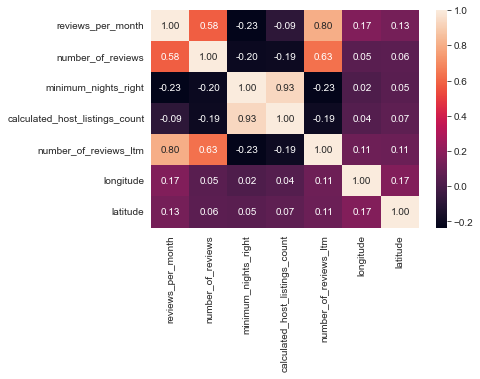

In [59]:
df_calendar_per_listing_complete = df_calendar_per_listing[['reviews_per_month', 'number_of_reviews', 'minimum_nights_right', 'calculated_host_listings_count', 'number_of_reviews_ltm', 'longitude', 'latitude', 'price_right']]
sns.heatmap(df_calendar_per_listing_complete.corr(), annot=True, fmt=".2f");

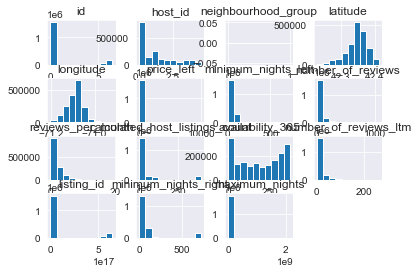

In [17]:
df_calendar_per_listing.hist();

In [61]:
df_calendar_per_listing_complete = df_calendar_per_listing[['reviews_per_month', 'number_of_reviews', 'minimum_nights_right', 'calculated_host_listings_count', 'number_of_reviews_ltm',  'price_right']]
df_calendar_per_listing_complete['price_right']=df_calendar_per_listing_complete['price_right'].str[1:]

df_calendar_per_listing_complete['price_right']=df_calendar_per_listing_complete['price_right'].str.replace(",","")

df_calendar_per_listing_clean =df_calendar_per_listing_complete.dropna()


X = df_calendar_per_listing_clean[['reviews_per_month', 'number_of_reviews', 'minimum_nights_right', 'calculated_host_listings_count', 'number_of_reviews_ltm']]

y = df_calendar_per_listing_clean['price_right']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)
y_test_preds = lm_model.predict(X_test)
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)


/home/mona/Documents/udacity/DataScience/repositories/cd0017-introduction-to-data-science/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mona/Documents/udacity/DataScience/repositories/cd0017-introduction-to-data-science/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


'The r-squared score for your model was 0.010197235416382955 on 409968 values.'